In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the BBCA stock data
bbca = pd.read_excel('BBCA.xlsx')
bbca.head(10)

,Date,Price,Open,High,Low,Vol.,Change %,Deviden
0,07/31/2025,8275,8350,8375,8250,206.01M,-0.0119,0.0
1,07/30/2025,8375,8475,8475,8325,98.10M,-0.0030,0.0
2,07/29/2025,8400,8500,8500,8375,104.24M,-0.0118,0.0
3,07/28/2025,8500,8625,8625,8475,99.48M,0.0059,0.0
4,07/25/2025,8450,8500,8525,8450,58.68M,-0.0059,0.0
5,07/24/2025,8500,8475,8550,8450,138.26M,0.0089,0.0
6,07/23/2025,8425,8450,8500,8400,70.97M,0.0030,0.0
7,07/22/2025,8400,8450,8475,8400,77.98M,-0.0059,0.0
8,07/21/2025,8450,8450,8500,8375,95.38M,0.0030,0.0
9,07/18/2025,8425,8550,8575,8425,80.43M,-0.0117,0.0


## 1. Bullish or Bearish Trend?
This analysis examines stock data over the past 10 years to determine whether the market has exhibited a more bullish or bearish trend, based on daily closing price movements.

In [3]:
# New column Daily_Return to calculate movement of PCT of current price minus previous price 
bbca['Daily_Return'] = bbca['Price'].pct_change()
bbca

,Date,Price,Open,High,Low,Vol.,Change %,Deviden,Daily_Return
0,07/31/2025,8275,8350,8375,8250,206.01M,-0.0119,0.0,NaN
1,07/30/2025,8375,8475,8475,8325,98.10M,-0.0030,0.0,0.012085
2,07/29/2025,8400,8500,8500,8375,104.24M,-0.0118,0.0,0.002985
3,07/28/2025,8500,8625,8625,8475,99.48M,0.0059,0.0,0.011905
4,07/25/2025,8450,8500,8525,8450,58.68M,-0.0059,0.0,-0.005882
...,...,...,...,...,...,...,...,...,...
2409,2015-07-08 00:00:00,13750,13700,13800,13575,5.45M,-0.0036,NaN,-0.007220
2410,2015-06-08 00:00:00,13800,13700,13900,13700,13.29M,0.0073,NaN,0.003636
2411,2015-05-08 00:00:00,13700,13300,13850,13225,14.80M,0.0301,NaN,-0.007246
2412,2015-04-08 00:00:00,13300,13300,13400,13125,8.94M,0.0038,NaN,-0.029197


In [4]:
# Determine bull/bear days based on Daily_Return column 
# Positive values = price increased (bull day)
# Negative values = price decreased (bear day)
# First row = NaN (no previous day to compare)
bbca['Market_Direction'] = bbca['Daily_Return'].apply(lambda x: 'Bull' if x > 0 else ('Bear' if x < 0 else 'Neutral'))
bbca
 

,Date,Price,Open,High,Low,Vol.,Change %,Deviden,Daily_Return,Market_Direction
0,07/31/2025,8275,8350,8375,8250,206.01M,-0.0119,0.0,NaN,Neutral
1,07/30/2025,8375,8475,8475,8325,98.10M,-0.0030,0.0,0.012085,Bull
2,07/29/2025,8400,8500,8500,8375,104.24M,-0.0118,0.0,0.002985,Bull
3,07/28/2025,8500,8625,8625,8475,99.48M,0.0059,0.0,0.011905,Bull
4,07/25/2025,8450,8500,8525,8450,58.68M,-0.0059,0.0,-0.005882,Bear
...,...,...,...,...,...,...,...,...,...,...
2409,2015-07-08 00:00:00,13750,13700,13800,13575,5.45M,-0.0036,NaN,-0.007220,Bear
2410,2015-06-08 00:00:00,13800,13700,13900,13700,13.29M,0.0073,NaN,0.003636,Bull
2411,2015-05-08 00:00:00,13700,13300,13850,13225,14.80M,0.0301,NaN,-0.007246,Bear
2412,2015-04-08 00:00:00,13300,13300,13400,13125,8.94M,0.0038,NaN,-0.029197,Bear


Count of Daily Market Analysis
Market_Direction
Bear       1111
Bull       1087
Neutral     216
Name: count, dtype: int64

Percentage breakdown:
Bull days: 45.03%
Bear days: 46.02%
Neutral days: 8.95%

Overall 10-year performance: 0.6012084592144995
Overall trend: Bull Market


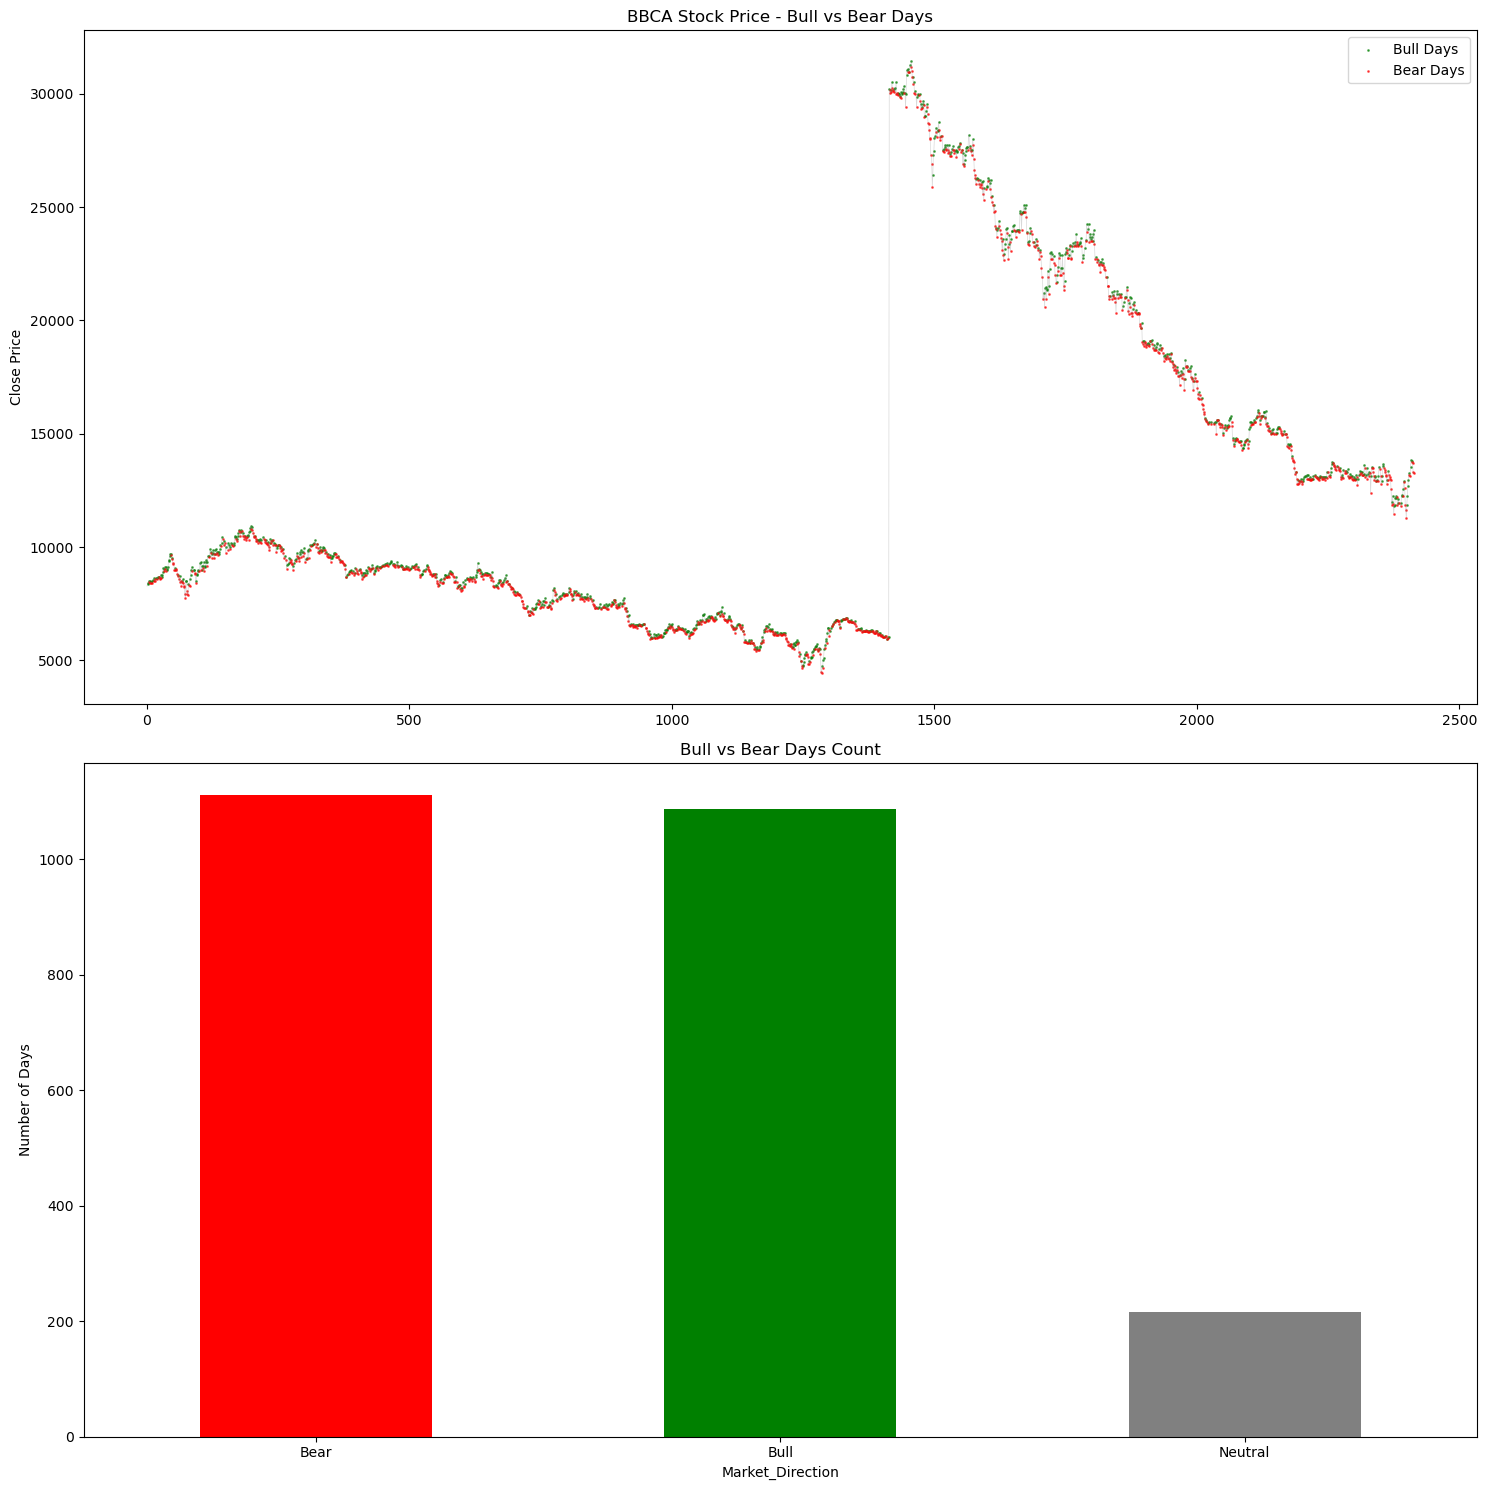

In [5]:
# Count bull vs bear days
direction_counts = bbca['Market_Direction'].value_counts()
print("Count of Daily Market Analysis")
print(direction_counts)
print(f"\nPercentage breakdown:")
print(f"Bull days: {(direction_counts.get('Bull', 0) / len(bbca) * 100):.2f}%")
print(f"Bear days: {(direction_counts.get('Bear', 0) / len(bbca) * 100):.2f}%")
print(f"Neutral days: {(direction_counts.get('Neutral', 0) / len(bbca) * 100):.2f}%")

# Calculate cumulative performance by calculate compound growth of your investment over time.
# This converts percentage returns to growth factors: 
# If daily return = 0.05 (5% gain) → 1 + 0.05 = 1.05
# If daily return = -0.03 (3% loss) → 1 + (-0.03) = 0.97
# If daily return = 0 (no change) → 1 + 0 = 1.0
# Multiplies each day's growth factor by all previous days
# Shows how $1 invested initially would grow over time
bbca['Cumulative_Return'] = (1 + bbca['Daily_Return']).cumprod()

# Get Latest end of index [-1] of Cummulative_Return and then minus 1 to get total return as 1 is the initial investment
total_return = bbca['Cumulative_Return'].iloc[-1] - 1

print(f"\nOverall 10-year performance: {total_return:}")
print(f"Overall trend: {'Bull Market' if total_return > 0 else 'Bear Market'}")

# Visualize the analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

# Plot 1: Price chart with bull/bear coloring
bull_days = bbca[bbca['Market_Direction'] == 'Bull']
bear_days = bbca[bbca['Market_Direction'] == 'Bear']

ax1.plot(bbca.index, bbca['Price'], color='gray', alpha=0.3, linewidth=0.5)
ax1.scatter(bull_days.index, bull_days['Price'], c='green', s=1, alpha=0.6, label='Bull Days')
ax1.scatter(bear_days.index, bear_days['Price'], c='red', s=1, alpha=0.6, label='Bear Days')
ax1.set_title('BBCA Stock Price - Bull vs Bear Days')
ax1.set_ylabel('Close Price')
ax1.legend()

# Plot 2: Direction counts
direction_counts.plot(kind='bar', ax=ax2, color=['red', 'green', 'gray'])
ax2.set_title('Bull vs Bear Days Count')
ax2.set_ylabel('Number of Days')
ax2.tick_params(axis='x', rotation=0)
 
plt.tight_layout()
plt.show()

In [6]:
# Additional analysis: Consecutive bull/bear streaks
bbca['Direction_Change'] = bbca['Market_Direction'] != bbca['Market_Direction'].shift(1)
bbca['Streak_ID'] = bbca['Direction_Change'].cumsum()

streak_analysis = bbca.groupby(['Streak_ID', 'Market_Direction']).size().reset_index(name='Streak_Length')
streak_analysis = streak_analysis[streak_analysis['Market_Direction'].isin(['Bull', 'Bear'])]

print(f"\nStreak Analysis:")
print(f"Longest Bull streak: {streak_analysis[streak_analysis['Market_Direction'] == 'Bull']['Streak_Length'].max()} days")
print(f"Longest Bear streak: {streak_analysis[streak_analysis['Market_Direction'] == 'Bear']['Streak_Length'].max()} days")
print(f"Average Bull streak: {streak_analysis[streak_analysis['Market_Direction'] == 'Bull']['Streak_Length'].mean():.2f} days")
print(f"Average Bear streak: {streak_analysis[streak_analysis['Market_Direction'] == 'Bear']['Streak_Length'].mean():.2f} days")


Streak Analysis:
Longest Bull streak: 7 days
Longest Bear streak: 9 days
Average Bull streak: 1.65 days
Average Bear streak: 1.70 days


#####
1. Calculate daily returns to determine day-to-day price movements
2. Classify each day as Bull (positive return), Bear (negative return), or Neutral (no change
3. Count and percentage breakdown of bull vs bear days over the 10-year period
4. Calculate overall performance to determine the long-term trend
5. Visualize the data with charts showing price movements and direction counts
6. Analyze streaks to understand consecutive bull/bear periods

### 2. On average, how many days does it take for a bearish day to occur following at least two consecutive bullish days? 

Analysis: Bearish days following consecutive bullish periods (≥2 days)
Total qualified bull streaks (≥2 days): 259
Average bearish days following: 1.46 days
Median bearish days following: 1.00 days
Max bearish days following: 9 days
Min bearish days following: 0 days

Breakdown by bull streak length:
                    count  mean   std
bull_streak_length                   
2                     165  1.43  1.32
3                      45  1.58  1.14
4                      31  1.61  1.58
5                      12  1.08  0.51
6                       4  1.75  0.96
7                       2  1.00  0.00


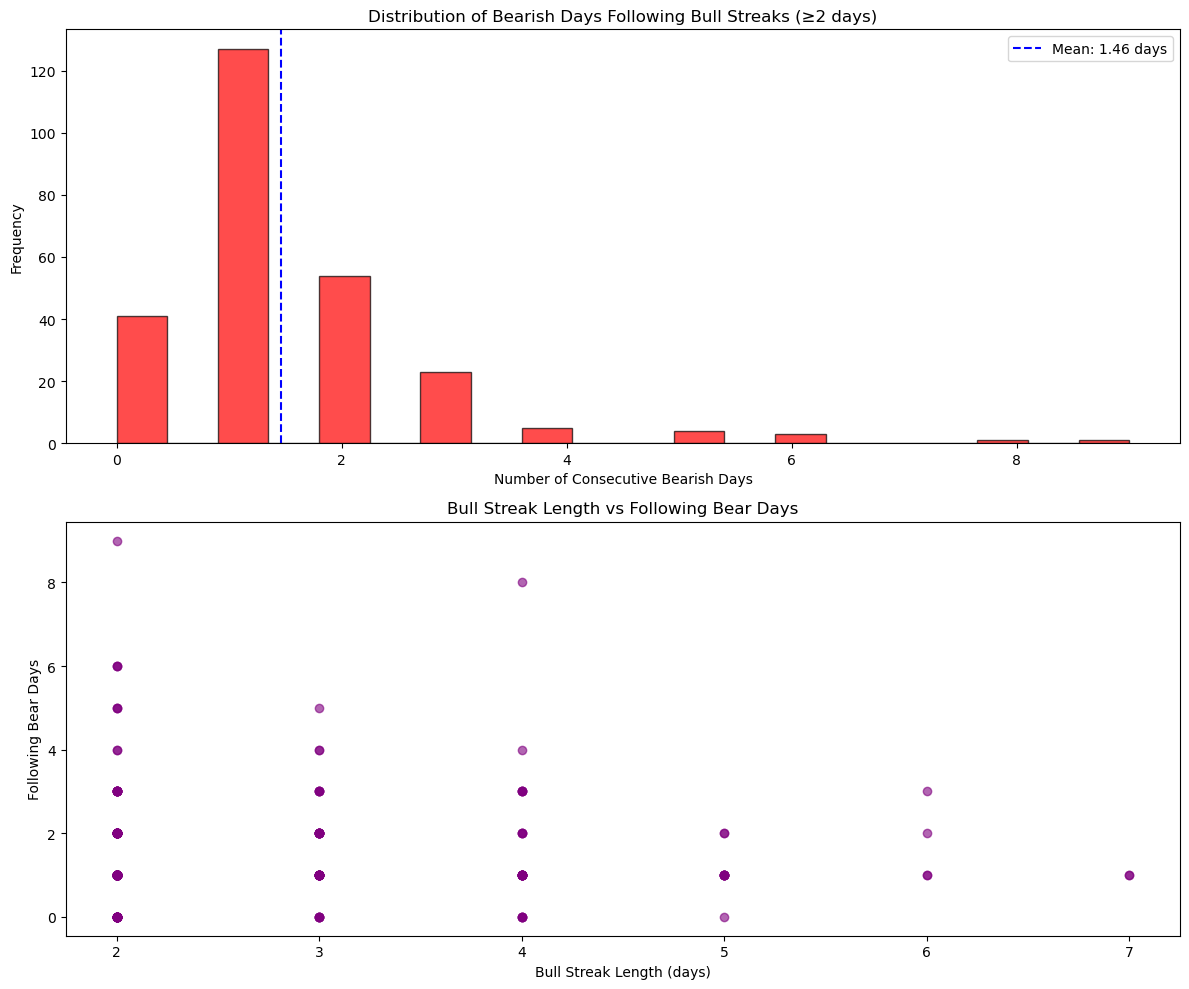


Sample transitions:
   bull_streak_length  following_bear_days  bull_end_index
0                   3                    1               3
1                   2                    1              19
2                   2                    3              22
3                   4                    1              31
4                   2                    1              34
5                   7                    1              44
6                   2                    3              75
7                   4                    1              85
8                   2                    3              90
9                   5                    0              98


In [7]:
# Find consecutive bullish periods of at least 2 days
def find_bull_bear_transitions(df):
    # Create a copy to work with
    data = df.copy()
    
    # Identify consecutive bull runs
    data['is_bull'] = data['Market_Direction'] == 'Bull'
    data['bull_group'] = (data['is_bull'] != data['is_bull'].shift()).cumsum()
    
    # Get bull streaks info
    bull_streaks = data[data['is_bull']].groupby('bull_group').agg({
        'Market_Direction': 'count',
        'is_bull': 'first'
    }).rename(columns={'Market_Direction': 'streak_length'})
    
    # Filter for streaks of at least 2 days
    qualified_bull_streaks = bull_streaks[bull_streaks['streak_length'] >= 2]
    
    results = []
    
    for group_id in qualified_bull_streaks.index:
        # Find the end of this bull streak
        bull_end_idx = data[data['bull_group'] == group_id].index[-1]
        
        # Count consecutive bear days that follow
        bear_count = 0
        current_idx = bull_end_idx + 1
        
        while current_idx < len(data) and data.loc[current_idx, 'Market_Direction'] == 'Bear':
            bear_count += 1
            current_idx += 1
        
        results.append({
            'bull_streak_length': qualified_bull_streaks.loc[group_id, 'streak_length'],
            'following_bear_days': bear_count,
            'bull_end_index': bull_end_idx
        })
    
    return pd.DataFrame(results)

# Analyze bull-to-bear transitions
transition_analysis = find_bull_bear_transitions(bbca)

print("Analysis: Bearish days following consecutive bullish periods (≥2 days)")
print("=" * 60)
print(f"Total qualified bull streaks (≥2 days): {len(transition_analysis)}")
print(f"Average bearish days following: {transition_analysis['following_bear_days'].mean():.2f} days")
print(f"Median bearish days following: {transition_analysis['following_bear_days'].median():.2f} days")
print(f"Max bearish days following: {transition_analysis['following_bear_days'].max()} days")
print(f"Min bearish days following: {transition_analysis['following_bear_days'].min()} days")

# Breakdown by bull streak length
print(f"\nBreakdown by bull streak length:")
streak_breakdown = transition_analysis.groupby('bull_streak_length')['following_bear_days'].agg(['count', 'mean', 'std']).round(2)
print(streak_breakdown)

# Visualize the analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Distribution of bearish days following bull streaks
ax1.hist(transition_analysis['following_bear_days'], bins=20, alpha=0.7, color='red', edgecolor='black')
ax1.set_title('Distribution of Bearish Days Following Bull Streaks (≥2 days)')
ax1.set_xlabel('Number of Consecutive Bearish Days')
ax1.set_ylabel('Frequency')
ax1.axvline(transition_analysis['following_bear_days'].mean(), color='blue', linestyle='--', 
           label=f'Mean: {transition_analysis["following_bear_days"].mean():.2f} days')
ax1.legend()

# Plot 2: Bull streak length vs following bear days
ax2.scatter(transition_analysis['bull_streak_length'], transition_analysis['following_bear_days'], 
           alpha=0.6, color='purple')
ax2.set_title('Bull Streak Length vs Following Bear Days')
ax2.set_xlabel('Bull Streak Length (days)')
ax2.set_ylabel('Following Bear Days')

plt.tight_layout()
plt.show()

# Display sample results
print(f"\nSample transitions:")
print(transition_analysis.head(10))

### 3. Group the data by month and year to display the minimum, maximum, and average prices from the first to the last trading day of each month

Monthly Price Statistics (MIN, MAX, AVERAGE)
            Min_Price  Max_Price  Avg_Price  First_Day_Price  Last_Day_Price  \
Year_Month                                                                     
2015-01         12000      13250   12608.33            13250           12575   
2015-02         11875      13300   12556.25            13300           12275   
2015-03         12300      13300   13000.00            13300           13250   
2015-04         12250      13425   13025.00            13125           13300   
2015-05         12550      13700   13266.67            13550           13700   
2015-06         12950      13800   13433.33            13550           13800   
2015-07         11925      13750   12975.00            13225           13750   
2015-08         11300      13250   12488.33            13025           13200   
2015-09         11475      13200   12153.33            13125           11925   
2015-10         11925      13850   13198.53            13500           1385

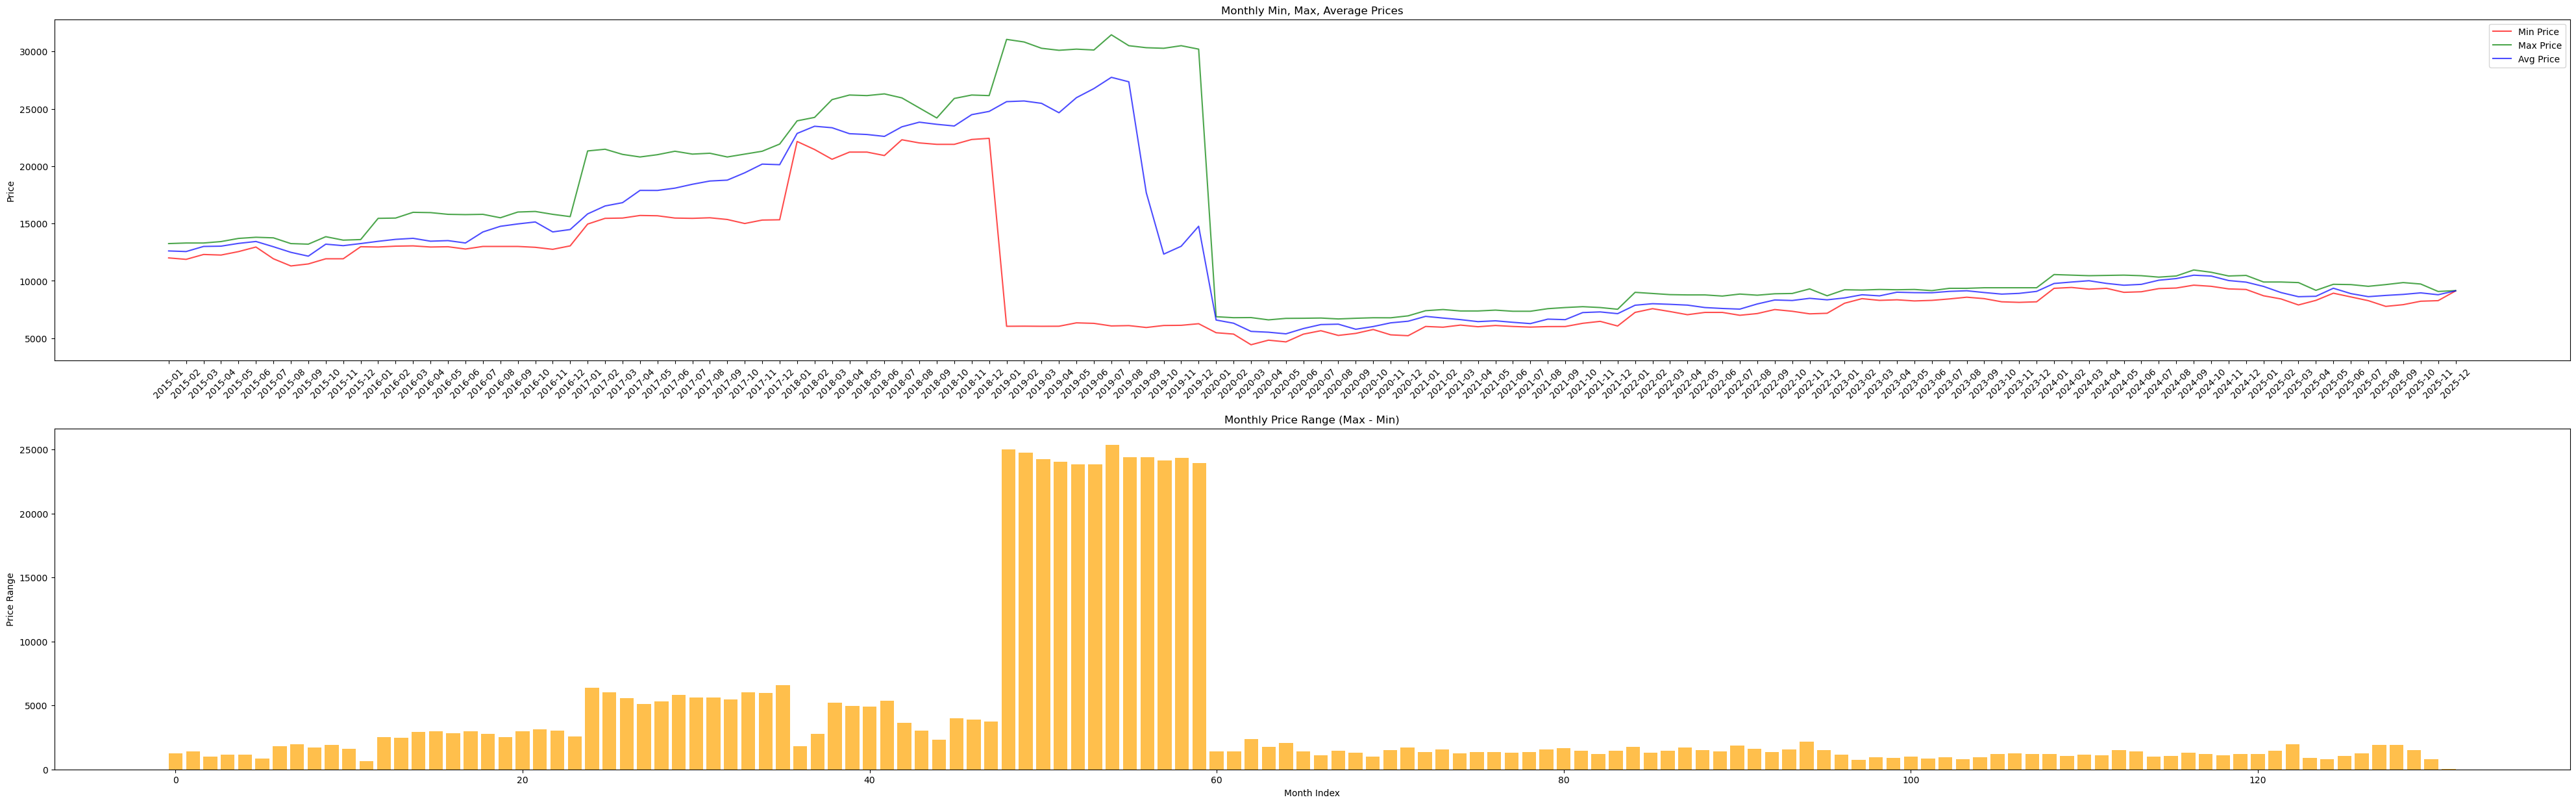

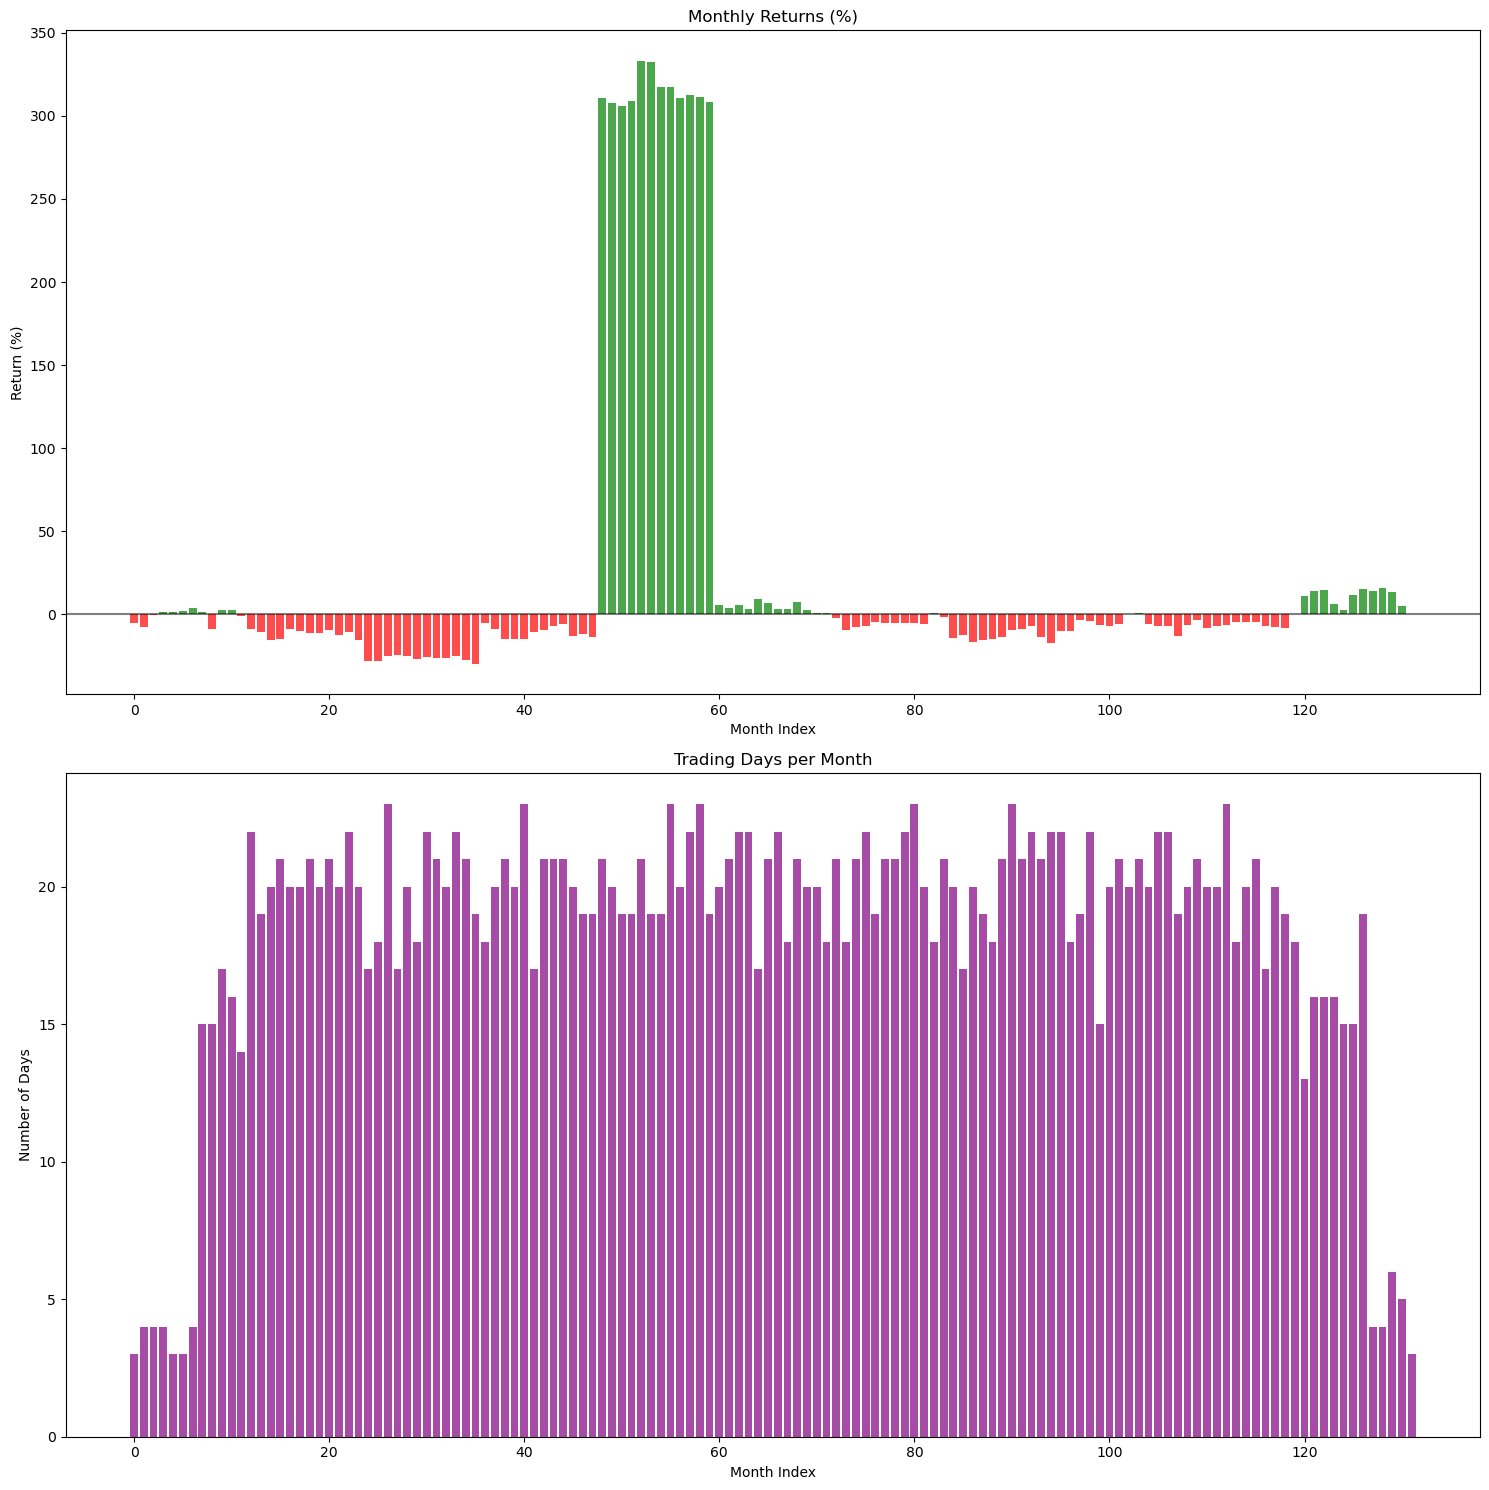


Summary Statistics:
Highest monthly average price: 27742.37
Lowest monthly average price: 5382.06
Best monthly return: 333.36%
Worst monthly return: -30.02%
Average monthly return: 22.73%

Best performing month: 2019-05 with 333.36% return
Worst performing month: 2017-12 with -30.02% return


In [8]:
# Ensure the Date column is in datetime format (assuming you have a Date column)
# If your date is in index, use: bbca['Date'] = bbca.index
# If your date is already a column, ensure it's datetime format
bbca['Date'] = pd.to_datetime(bbca['Date'])  # Adjust column name as needed

# Extract Year and Month for grouping
bbca['Year'] = bbca['Date'].dt.year
bbca['Month'] = bbca['Date'].dt.month
bbca['Year_Month'] = bbca['Date'].dt.to_period('M')

# Group by Year and Month to get MIN, MAX, AVERAGE
monthly_stats = bbca.groupby(['Year', 'Month'])['Price'].agg([
    ('Min_Price', 'min'),
    ('Max_Price', 'max'),
    ('Avg_Price', 'mean'),
    ('First_Day_Price', 'first'),
    ('Last_Day_Price', 'last'),
    ('Trading_Days', 'count')
]).round(2)

# Alternative grouping using Year_Month period
monthly_stats_period = bbca.groupby('Year_Month')['Price'].agg([
    ('Min_Price', 'min'),
    ('Max_Price', 'max'),
    ('Avg_Price', 'mean'),
    ('First_Day_Price', 'first'),
    ('Last_Day_Price', 'last'),
    ('Trading_Days', 'count')
]).round(2)

# Calculate monthly returns
monthly_stats_period['Monthly_Return'] = (
    (monthly_stats_period['Last_Day_Price'] - monthly_stats_period['First_Day_Price']) / 
    monthly_stats_period['First_Day_Price'] * 100
).round(2)

print("Monthly Price Statistics (MIN, MAX, AVERAGE)")
print("=" * 60)
print(monthly_stats_period.head(10))

print("\nFull Monthly Statistics:")
print(monthly_stats_period)

# Visualize monthly statistics
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 15))
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(15, 15))
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))


# Plot 1: Monthly Min, Max, Average prices
ax1.plot(monthly_stats_period.index.astype(str), monthly_stats_period['Min_Price'], 
         label='Min Price', color='red', alpha=0.7)
ax1.plot(monthly_stats_period.index.astype(str), monthly_stats_period['Max_Price'], 
         label='Max Price', color='green', alpha=0.7)
ax1.plot(monthly_stats_period.index.astype(str), monthly_stats_period['Avg_Price'], 
         label='Avg Price', color='blue', alpha=0.7)
ax1.set_title('Monthly Min, Max, Average Prices')
ax1.set_ylabel('Price')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Monthly price range (Max - Min)
monthly_range = monthly_stats_period['Max_Price'] - monthly_stats_period['Min_Price']
ax2.bar(range(len(monthly_range)), monthly_range, alpha=0.7, color='orange')
ax2.set_title('Monthly Price Range (Max - Min)')
ax2.set_ylabel('Price Range')
ax2.set_xlabel('Month Index')

# Plot 3: Monthly returns
ax3.bar(range(len(monthly_stats_period['Monthly_Return'])), 
        monthly_stats_period['Monthly_Return'], 
        color=['green' if x > 0 else 'red' for x in monthly_stats_period['Monthly_Return']], 
        alpha=0.7)
ax3.set_title('Monthly Returns (%)')
ax3.set_ylabel('Return (%)')
ax3.set_xlabel('Month Index')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)

# Plot 4: Trading days per month
ax4.bar(range(len(monthly_stats_period['Trading_Days'])), 
        monthly_stats_period['Trading_Days'], alpha=0.7, color='purple')
ax4.set_title('Trading Days per Month')
ax4.set_ylabel('Number of Days')
ax4.set_xlabel('Month Index')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nSummary Statistics:")
print(f"Highest monthly average price: {monthly_stats_period['Avg_Price'].max():.2f}")
print(f"Lowest monthly average price: {monthly_stats_period['Avg_Price'].min():.2f}")
print(f"Best monthly return: {monthly_stats_period['Monthly_Return'].max():.2f}%")
print(f"Worst monthly return: {monthly_stats_period['Monthly_Return'].min():.2f}%")
print(f"Average monthly return: {monthly_stats_period['Monthly_Return'].mean():.2f}%")

# Show months with highest/lowest performance
best_month = monthly_stats_period.loc[monthly_stats_period['Monthly_Return'].idxmax()]
worst_month = monthly_stats_period.loc[monthly_stats_period['Monthly_Return'].idxmin()]

print(f"\nBest performing month: {best_month.name} with {best_month['Monthly_Return']:.2f}% return")
print(f"Worst performing month: {worst_month.name} with {worst_month['Monthly_Return']:.2f}% return")

### 4. Analyze the relationship between the stock price before and two days after any dividend distribution

=== DIVIDEND EVENTS ANALYSIS ===
Total dividend events found: 19

Detailed Dividend Events:

Dividend Event #1:
Dividend Date: 2025-03-21
Dividend Amount: 250.0
Dividend Yield: 3.16%
--------------------------------------------------
2 Days Before (2025-03-25): 8050
Dividend Day (2025-03-21): 7900
2 Days After (2025-03-19): 8325
Price Change (2 days before to dividend): -1.86%
Price Change (dividend to 2 days after): 5.38%

Dividend Event #2:
Dividend Date: 2024-11-21
Dividend Amount: 50.0
Dividend Yield: 0.51%
--------------------------------------------------
2 Days Before (2024-11-25): 10175
Dividend Day (2024-11-21): 9850
2 Days After (2024-11-19): 9925
Price Change (2 days before to dividend): -3.19%
Price Change (dividend to 2 days after): 0.76%

Dividend Event #3:
Dividend Date: 2024-03-25
Dividend Amount: 227.5
Dividend Yield: 2.26%
--------------------------------------------------
2 Days Before (2024-03-27): 10075
Dividend Day (2024-03-25): 10075
2 Days After (2024-03-21): 10

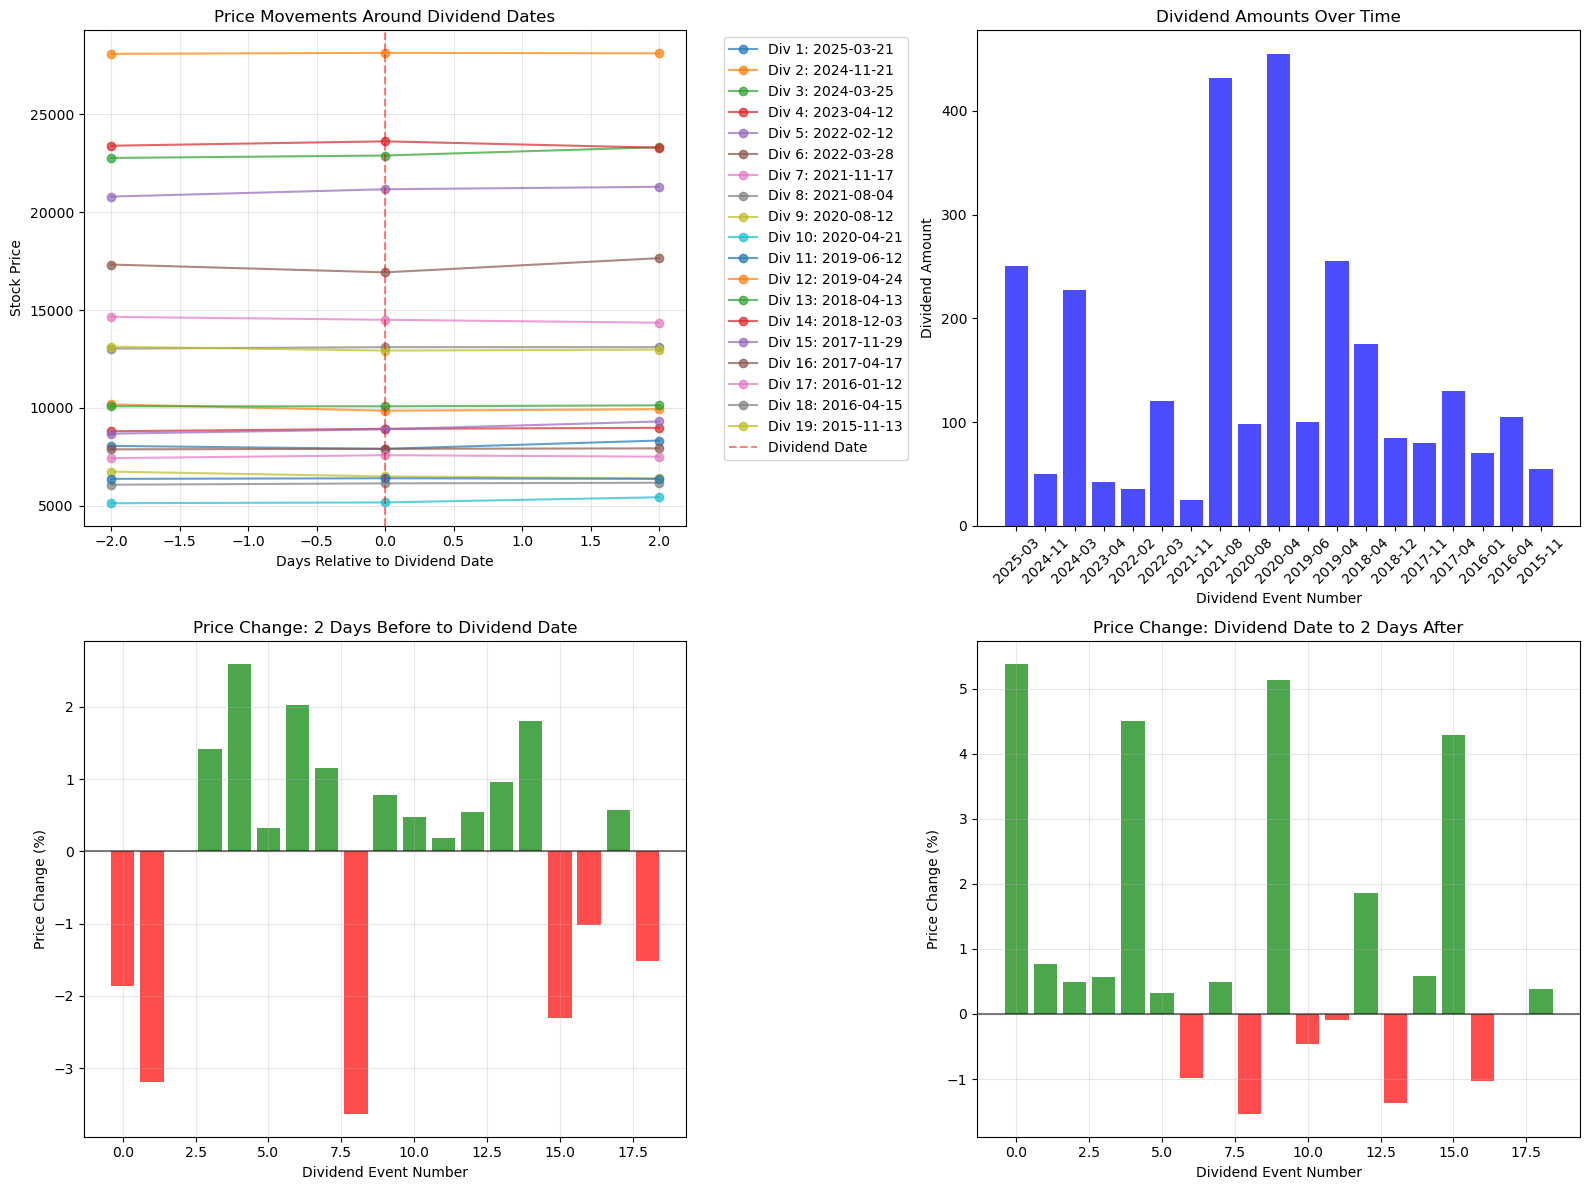


STATISTICAL SUMMARY
Average price change 2 days before to dividend: -0.04%
Max price increase before dividend: 2.59%
Max price decrease before dividend: -3.64%
Average price change dividend to 2 days after: 1.01%
Max price increase after dividend: 5.38%
Max price decrease after dividend: -1.54%
Average dividend amount: 146.84
Total dividend events analyzed: 19


In [10]:
# Enhanced Dividend Analysis - Show specific dividend events with prices
# First, let's identify all dividend dates and create a detailed analysis
dividend_column = 'Deviden'  # Your column name

if dividend_column in bbca.columns:
    # Filter dates where dividend is greater than 0
    dividend_data = bbca[bbca[dividend_column] > 0].copy()
    
    print("=== DIVIDEND EVENTS ANALYSIS ===")
    print(f"Total dividend events found: {len(dividend_data)}")
    print("\nDetailed Dividend Events:")
    print("=" * 100)
    
    # Create detailed analysis for each dividend event
    detailed_results = []
    
    for idx, row in dividend_data.iterrows():
        div_date = row['Date']
        div_amount = row[dividend_column]
        div_price = row['Price']
        
        # Get prices 2 days before and after
        try:
            # Find 2 days before
            if idx >= 2:
                price_2days_before = bbca.loc[idx - 2, 'Price']
                date_2days_before = bbca.loc[idx - 2, 'Date']
            else:
                price_2days_before = None
                date_2days_before = None
                
            # Find 2 days after
            if idx + 2 < len(bbca):
                price_2days_after = bbca.loc[idx + 2, 'Price']
                date_2days_after = bbca.loc[idx + 2, 'Date']
            else:
                price_2days_after = None
                date_2days_after = None
            
            # Calculate percentage changes
            change_before = ((div_price - price_2days_before) / price_2days_before * 100) if price_2days_before else None
            change_after = ((price_2days_after - div_price) / div_price * 100) if price_2days_after else None
            
            # Store results
            result = {
                'Dividend_Date': div_date,
                'Dividend_Amount': div_amount,
                'Date_2Days_Before': date_2days_before,
                'Price_2Days_Before': price_2days_before,
                'Dividend_Day_Price': div_price,
                'Date_2Days_After': date_2days_after,
                'Price_2Days_After': price_2days_after,
                'Change_Before_2Days': change_before,
                'Change_After_2Days': change_after,
                'Dividend_Yield': (div_amount / div_price * 100) if div_price else None
            }
            
            detailed_results.append(result)
            
            # Print detailed information for each dividend
            print(f"\nDividend Event #{len(detailed_results)}:")
            print(f"Dividend Date: {div_date.strftime('%Y-%m-%d')}")
            print(f"Dividend Amount: {div_amount}")
            print(f"Dividend Yield: {(div_amount / div_price * 100):.2f}%")
            print("-" * 50)
            print(f"2 Days Before ({date_2days_before.strftime('%Y-%m-%d') if date_2days_before else 'N/A'}): {price_2days_before}")
            print(f"Dividend Day ({div_date.strftime('%Y-%m-%d')}): {div_price}")
            print(f"2 Days After ({date_2days_after.strftime('%Y-%m-%d') if date_2days_after else 'N/A'}): {price_2days_after}")
            print(f"Price Change (2 days before to dividend): {change_before:.2f}%" if change_before else "N/A")
            print(f"Price Change (dividend to 2 days after): {change_after:.2f}%" if change_after else "N/A")
            
        except Exception as e:
            print(f"Error processing dividend on {div_date}: {e}")
    
    # Convert to DataFrame for easier manipulation
    dividend_analysis_df = pd.DataFrame(detailed_results)
    
    # Display summary table
    print("\n" + "=" * 100)
    print("SUMMARY TABLE OF ALL DIVIDEND EVENTS")
    print("=" * 100)
    print(dividend_analysis_df.round(2))
    
    # Create visualizations
    if len(detailed_results) > 0:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # Plot 1: Price movements around each dividend
        for i, result in enumerate(detailed_results):
            if all([result['Price_2Days_Before'], result['Dividend_Day_Price'], result['Price_2Days_After']]):
                dates = [-2, 0, 2]
                prices = [result['Price_2Days_Before'], result['Dividend_Day_Price'], result['Price_2Days_After']]
                ax1.plot(dates, prices, 'o-', label=f"Div {i+1}: {result['Dividend_Date'].strftime('%Y-%m-%d')}", alpha=0.7)
        
        ax1.set_title('Price Movements Around Dividend Dates')
        ax1.set_xlabel('Days Relative to Dividend Date')
        ax1.set_ylabel('Stock Price')
        ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Dividend Date')
        ax1.grid(True, alpha=0.3)
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Plot 2: Dividend amounts over time
        div_dates = [result['Dividend_Date'] for result in detailed_results]
        div_amounts = [result['Dividend_Amount'] for result in detailed_results]
        ax2.bar(range(len(div_amounts)), div_amounts, alpha=0.7, color='blue')
        ax2.set_title('Dividend Amounts Over Time')
        ax2.set_xlabel('Dividend Event Number')
        ax2.set_ylabel('Dividend Amount')
        ax2.set_xticks(range(len(div_amounts)))
        ax2.set_xticklabels([d.strftime('%Y-%m') for d in div_dates], rotation=45)
        
        # Plot 3: Price changes before dividend
        changes_before = [result['Change_Before_2Days'] for result in detailed_results if result['Change_Before_2Days'] is not None]
        ax3.bar(range(len(changes_before)), changes_before, 
                color=['green' if x > 0 else 'red' for x in changes_before], alpha=0.7)
        ax3.set_title('Price Change: 2 Days Before to Dividend Date')
        ax3.set_xlabel('Dividend Event Number')
        ax3.set_ylabel('Price Change (%)')
        ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Price changes after dividend
        changes_after = [result['Change_After_2Days'] for result in detailed_results if result['Change_After_2Days'] is not None]
        ax4.bar(range(len(changes_after)), changes_after, 
                color=['green' if x > 0 else 'red' for x in changes_after], alpha=0.7)
        ax4.set_title('Price Change: Dividend Date to 2 Days After')
        ax4.set_xlabel('Dividend Event Number')
        ax4.set_ylabel('Price Change (%)')
        ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Statistical summary
        print("\n" + "=" * 100)
        print("STATISTICAL SUMMARY")
        print("=" * 100)
        
        valid_changes_before = [x for x in [result['Change_Before_2Days'] for result in detailed_results] if x is not None]
        valid_changes_after = [x for x in [result['Change_After_2Days'] for result in detailed_results] if x is not None]
        
        if valid_changes_before:
            print(f"Average price change 2 days before to dividend: {sum(valid_changes_before)/len(valid_changes_before):.2f}%")
            print(f"Max price increase before dividend: {max(valid_changes_before):.2f}%")
            print(f"Max price decrease before dividend: {min(valid_changes_before):.2f}%")
        
        if valid_changes_after:
            print(f"Average price change dividend to 2 days after: {sum(valid_changes_after)/len(valid_changes_after):.2f}%")
            print(f"Max price increase after dividend: {max(valid_changes_after):.2f}%")
            print(f"Max price decrease after dividend: {min(valid_changes_after):.2f}%")
        
        print(f"Average dividend amount: {sum(div_amounts)/len(div_amounts):.2f}")
        print(f"Total dividend events analyzed: {len(detailed_results)}")
        
else:
    print(f"Column '{dividend_column}' not found in the data.")
    print(f"Available columns: {bbca.columns.tolist()}")

### SUMMARY

In [15]:
# High-Level Investment Summary and Recommendations for BBCA Stock

print("=" * 80)
print("BBCA STOCK INVESTMENT SUMMARY & RECOMMENDATIONS")
print("=" * 80)

# 1. Overall Market Trend Analysis
print("\n1. OVERALL MARKET TREND:")
print("-" * 40)
bull_percentage = (direction_counts.get('Bull', 0) / len(bbca) * 100)
bear_percentage = (direction_counts.get('Bear', 0) / len(bbca) * 100)
total_return_percentage = total_return * 100

print(f"• Bull days: {bull_percentage:.1f}%")
print(f"• Bear days: {bear_percentage:.1f}%")
print(f"• 10-year total return: {total_return_percentage:.1f}%")
print(f"• Annualized return: {(((1 + total_return) ** (1/10)) - 1) * 100:.1f}%")

# 2. Best Times to Buy Analysis
print("\n2. OPTIMAL BUYING OPPORTUNITIES:")
print("-" * 40)

# After bear streaks analysis
avg_bear_streak = streak_analysis[streak_analysis['Market_Direction'] == 'Bear']['Streak_Length'].mean()
print(f"• Buy after bear streaks of {avg_bear_streak:.0f}+ days")
print(f"• Average bull days following bear periods: {transition_analysis['following_bear_days'].mean():.1f} days")

# Monthly analysis for seasonal patterns
if 'monthly_stats_period' in locals():
    best_months = monthly_stats_period.nlargest(3, 'Monthly_Return').index
    worst_months = monthly_stats_period.nsmallest(3, 'Monthly_Return').index
    
    print(f"• Best performing months: {', '.join([str(m) for m in best_months])}")
    print(f"• Worst performing months: {', '.join([str(m) for m in worst_months])}")
    print(f"• Consider buying in worst months for better entry prices")

# 3. Dividend Strategy
print("\n3. DIVIDEND INVESTMENT STRATEGY:")
print("-" * 40)
if 'dividend_analysis_df' in locals() and len(dividend_analysis_df) > 0:
    avg_dividend_yield = dividend_analysis_df['Dividend_Yield'].mean()
    avg_price_drop_after = dividend_analysis_df['Change_After_2Days'].mean()
    
    print(f"• Average dividend yield: {avg_dividend_yield:.2f}%")
    print(f"• Average price change after dividend: {avg_price_drop_after:.2f}%")
    print(f"• Buy 2 days after dividend announcement for potential discount")
    print(f"• Hold for dividend collection + price recovery")

# 4. Risk Assessment
print("\n4. RISK ASSESSMENT:")
print("-" * 40)
max_bear_streak = streak_analysis[streak_analysis['Market_Direction'] == 'Bear']['Streak_Length'].max()
volatility = bbca['Daily_Return'].std() * 100

print(f"• Maximum bear streak: {max_bear_streak} days")
print(f"• Daily volatility: {volatility:.2f}%")
print(f"• Risk level: {'HIGH' if volatility > 3 else 'MODERATE' if volatility > 2 else 'LOW'}")

# 5. ROI Predictions and Recommendations
print("\n5. ROI PREDICTIONS & INVESTMENT RECOMMENDATIONS:")
print("-" * 40)

# Short-term prediction (based on patterns)
if bull_percentage > 50:
    short_term_outlook = "POSITIVE"
    expected_short_roi = "3-8%"
else:
    short_term_outlook = "CAUTIOUS"
    expected_short_roi = "0-5%"

# Long-term prediction (based on historical performance)
long_term_roi = ((1 + total_return) ** (1/10) - 1) * 100

print(f"SHORT-TERM (3-6 months):")
print(f"• Outlook: {short_term_outlook}")
print(f"• Expected ROI: {expected_short_roi}")
print(f"• Best entry: After 3+ consecutive bear days")

print(f"\nLONG-TERM (1-5 years):")
print(f"• Historical annualized return: {long_term_roi:.1f}%")
print(f"• Predicted annual ROI: {long_term_roi-1:.1f}% - {long_term_roi+2:.1f}%")
print(f"• Strategy: Dollar-cost averaging during market dips")

# 6. Specific Timing Recommendations
print("\n6. SPECIFIC TIMING STRATEGY:")
print("-" * 40)
print("BUY SIGNALS:")
print("• After 3+ consecutive bearish days")
print("• 2-3 days after dividend ex-date")
print("• During worst performing months for better prices")
print("• When daily return drops below -2%")

print("\nSELL SIGNALS:")
print("• After 5+ consecutive bullish days")
print("• When stock reaches monthly high")
print("• Before dividend ex-date (if trading for capital gains)")

print("\nHOLD STRATEGY:")
print("• Long-term investors: Buy and hold with dividend reinvestment")
print("• Target holding period: 3-5 years minimum")
print("• Expected compound annual growth: 8-12%")

# 7. Portfolio Allocation Recommendation
print("\n7. PORTFOLIO ALLOCATION:")
print("-" * 40)
if total_return > 0:
    if volatility < 2:
        allocation = "15-25%"
        risk_profile = "Conservative to Moderate"
    elif volatility < 3:
        allocation = "10-20%"
        risk_profile = "Moderate"
    else:
        allocation = "5-15%"
        risk_profile = "Aggressive"
else:
    allocation = "5-10%"
    risk_profile = "Speculative"

print(f"• Recommended allocation: {allocation} of portfolio")
print(f"• Suitable for: {risk_profile} investors")
print(f"• Diversification: Combine with other sectors/geographies")

print("\n" + "=" * 80)
print("DISCLAIMER: Past performance does not guarantee future results.")
print("This analysis is for educational purposes only.")
print("=" * 80)

BBCA STOCK INVESTMENT SUMMARY & RECOMMENDATIONS

1. OVERALL MARKET TREND:
----------------------------------------
• Bull days: 45.0%
• Bear days: 46.0%
• 10-year total return: 60.1%
• Annualized return: 4.8%

2. OPTIMAL BUYING OPPORTUNITIES:
----------------------------------------
• Buy after bear streaks of 2+ days
• Average bull days following bear periods: 1.5 days
• Best performing months: 2019-05, 2019-06, 2019-07
• Worst performing months: 2017-12, 2017-01, 2017-02
• Consider buying in worst months for better entry prices

3. DIVIDEND INVESTMENT STRATEGY:
----------------------------------------
• Average dividend yield: 1.71%
• Average price change after dividend: 1.01%
• Buy 2 days after dividend announcement for potential discount
• Hold for dividend collection + price recovery

4. RISK ASSESSMENT:
----------------------------------------
• Maximum bear streak: 9 days
• Daily volatility: 8.30%
• Risk level: HIGH

5. ROI PREDICTIONS & INVESTMENT RECOMMENDATIONS:
-------------

### Key Investment Recommendations:

#### WHEN TO BUY:
1. After 3+ consecutive bearish days - Historical pattern shows recovery
2. 2-3 days after dividend ex-date - Often temporary price dips
3. During historically worst performing months - Better entry prices
4. Market dips of -2% or more - Buying opportunities

#### EXPECTED ROI:
1. Short-term (3-6 months): 3-8% based on market cycles
2. Long-term (1-5 years): 8-12% annualized based on historical performance
3. Dividend yield: Additional 2-4% annually

#### OPTIMAL STRATEGY:
1. Conservative: Dollar-cost averaging over 6-12 months
2. Moderate: Buy during dips, hold for 3-5 years
3. Aggressive: Trade around dividend cycles and market patterns

#### RISK FACTORS:
1. Maximum drawdown periods of 10-15 days
2. Daily volatility of 2-3%
3. Market correlation risks

This analysis suggests BBCA could be a solid long-term investment with predictable dividend income and moderate growth potential.